In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore")

In [4]:
df=pd.read_csv(r"C:\Users\sanja\Desktop\DATASET")
df

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\sanja\\Desktop\\DATASET'

In [3]:
df.columns.to_list()

['Model_Year',
 'Make',
 'Model',
 'Vehicle Class',
 'Motor_(kW)',
 'Transmission',
 'Fuel_Type',
 'Range_(km)',
 'terminal_voltage',
 'terminal_current',
 'temperature',
 'charge_current',
 'charge_voltage',
 'time',
 'capacity',
 'cycle',
 'SOH']

In [4]:
df.describe(include='all')

,Model_Year,Make,Model,Vehicle Class,Motor_(kW),Transmission,Fuel_Type,Range_(km),terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
count,310.000000,310,310,310,310.000000,310,310,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
unique,NaN,22,148,9,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Tesla,i-MiEV,Full-size,NaN,A1,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,120,6,70,NaN,287,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019.206452,NaN,NaN,NaN,293.206452,NaN,NaN,374.680645,3.592427,-1.856775,31.450834,1.237577,2.489719,1259.064419,1.590565,79.245161,0.795282
std,2.655389,NaN,NaN,NaN,175.575473,NaN,NaN,149.383949,0.212056,0.538493,3.616797,1.469321,0.690153,861.079722,0.173711,43.749928,0.086856
min,2012.000000,NaN,NaN,NaN,35.000000,NaN,NaN,92.000000,3.011347,-2.016580,23.408863,-1.998400,0.000000,0.000000,1.297887,1.000000,0.648944
25%,2017.000000,NaN,NaN,NaN,150.000000,NaN,NaN,300.750000,3.472744,-2.013376,29.431633,1.998000,2.495250,555.910000,1.453901,41.000000,0.726951
50%,2020.000000,NaN,NaN,NaN,285.000000,NaN,NaN,385.500000,3.565428,-2.012377,31.434928,1.998200,2.594000,1144.125000,1.563849,83.000000,0.781925
75%,2022.000000,NaN,NaN,NaN,386.000000,NaN,NaN,482.500000,3.727240,-2.011314,33.478288,1.998200,2.749750,1733.855250,1.771743,107.000000,0.885872


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model_Year        310 non-null    int64  
 1   Make              310 non-null    object 
 2   Model             310 non-null    object 
 3   Vehicle Class     310 non-null    object 
 4   Motor_(kW)        310 non-null    int64  
 5   Transmission      310 non-null    object 
 6   Fuel_Type         310 non-null    object 
 7   Range_(km)        310 non-null    int64  
 8   terminal_voltage  310 non-null    float64
 9   terminal_current  310 non-null    float64
 10  temperature       310 non-null    float64
 11  charge_current    310 non-null    float64
 12  charge_voltage    310 non-null    float64
 13  time              310 non-null    float64
 14  capacity          310 non-null    float64
 15  cycle             310 non-null    int64  
 16  SOH               310 non-null    float64
dt

In [6]:
df.shape

(310, 17)

In [7]:
#df.corr()
#plt.figure(figsize=(8,5))
#sns.heatmap(df.corr(),annot=True)
#plt.title('Heatmap of Correlations',fontsize=15)
#plt.show()

In [8]:
df["Model_Year"].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [9]:
df["Make"].unique()

array(['Mitsubishi', 'Nissan', 'Ford', 'smart', 'Tesla', 'Chevrolet',
       'BMW', 'Kia', 'Tesla ', 'Hyundai', 'Volkswagen', 'Audi', 'Jaguar',
       'smart EQ', 'MINI', 'Porsche', 'Polestar', 'Volvo', 'Lucid',
       'Mazda', 'Mercedes-Benz', 'Rivian'], dtype=object)

In [10]:
df["Model"].unique()

array(['i-MiEV', 'LEAF', 'Focus Electric',
       'fortwo electric drive cabriolet', 'fortwo electric drive coupe',
       'Model S (40 kWh)', 'Model S (60 kWh)', 'Model S (85 kWh)',
       'Model S Performance', 'Spark EV', 'i3', 'Soul EV',
       'Model S (70 kWh)', 'Model S (85/90 kWh)', 'Model S 70D',
       'Model S 85D/90D', 'Model S P85D/P90D', 'LEAF (24 kWh)',
       'LEAF (30 kWh)', 'Model S (60 kWh pre- 6/16)', 'Model S (75 kWh)',
       'Model S 60D', 'Model S 75D', 'Model S 90D (Refresh)',
       'Model S P90D (Refresh)', 'Model S P100D', 'Model X 60D',
       'Model X 75D', 'Model X 90D', 'Model X P90D', 'Model X P100D',
       'i3 (60 Ah)', 'i3 (94 Ah)', 'Bolt EV', 'IONIQ Electric',
       'Model S 90D', 'Model S 100D', 'Model S P90D', 'Model X 100D',
       'e-Golf', 'i3s', 'Model 3 Mid Range', 'Model 3 Long Range',
       'Model 3 Long Range AWD', 'Model 3 Long Range AWD Performance',
       'e-tron 55 quattro', 'i3 (120 Ah)', 'i3s (120 Ah)',
       'Kona Electric', 'I-

In [11]:
df["Transmission"].unique()

array(['A1', 'A2'], dtype=object)

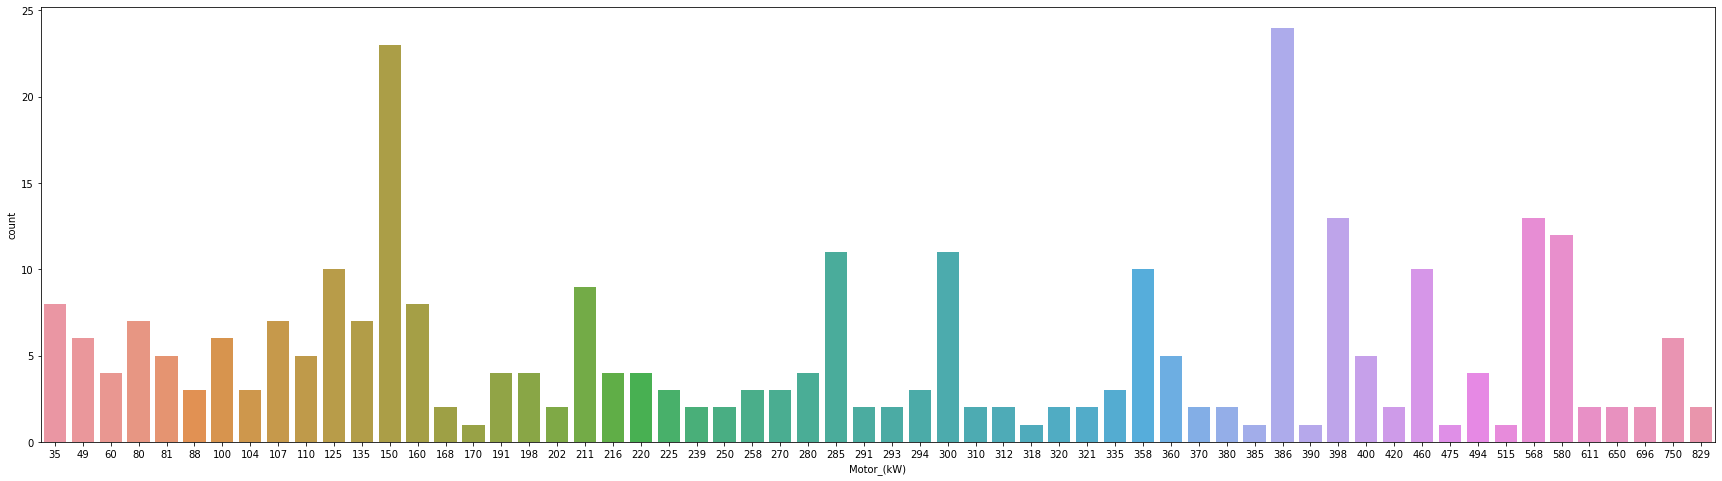

In [12]:
plt.figure(figsize=(30, 8))
sns.countplot(x=df["Motor_(kW)"])

plt.show()

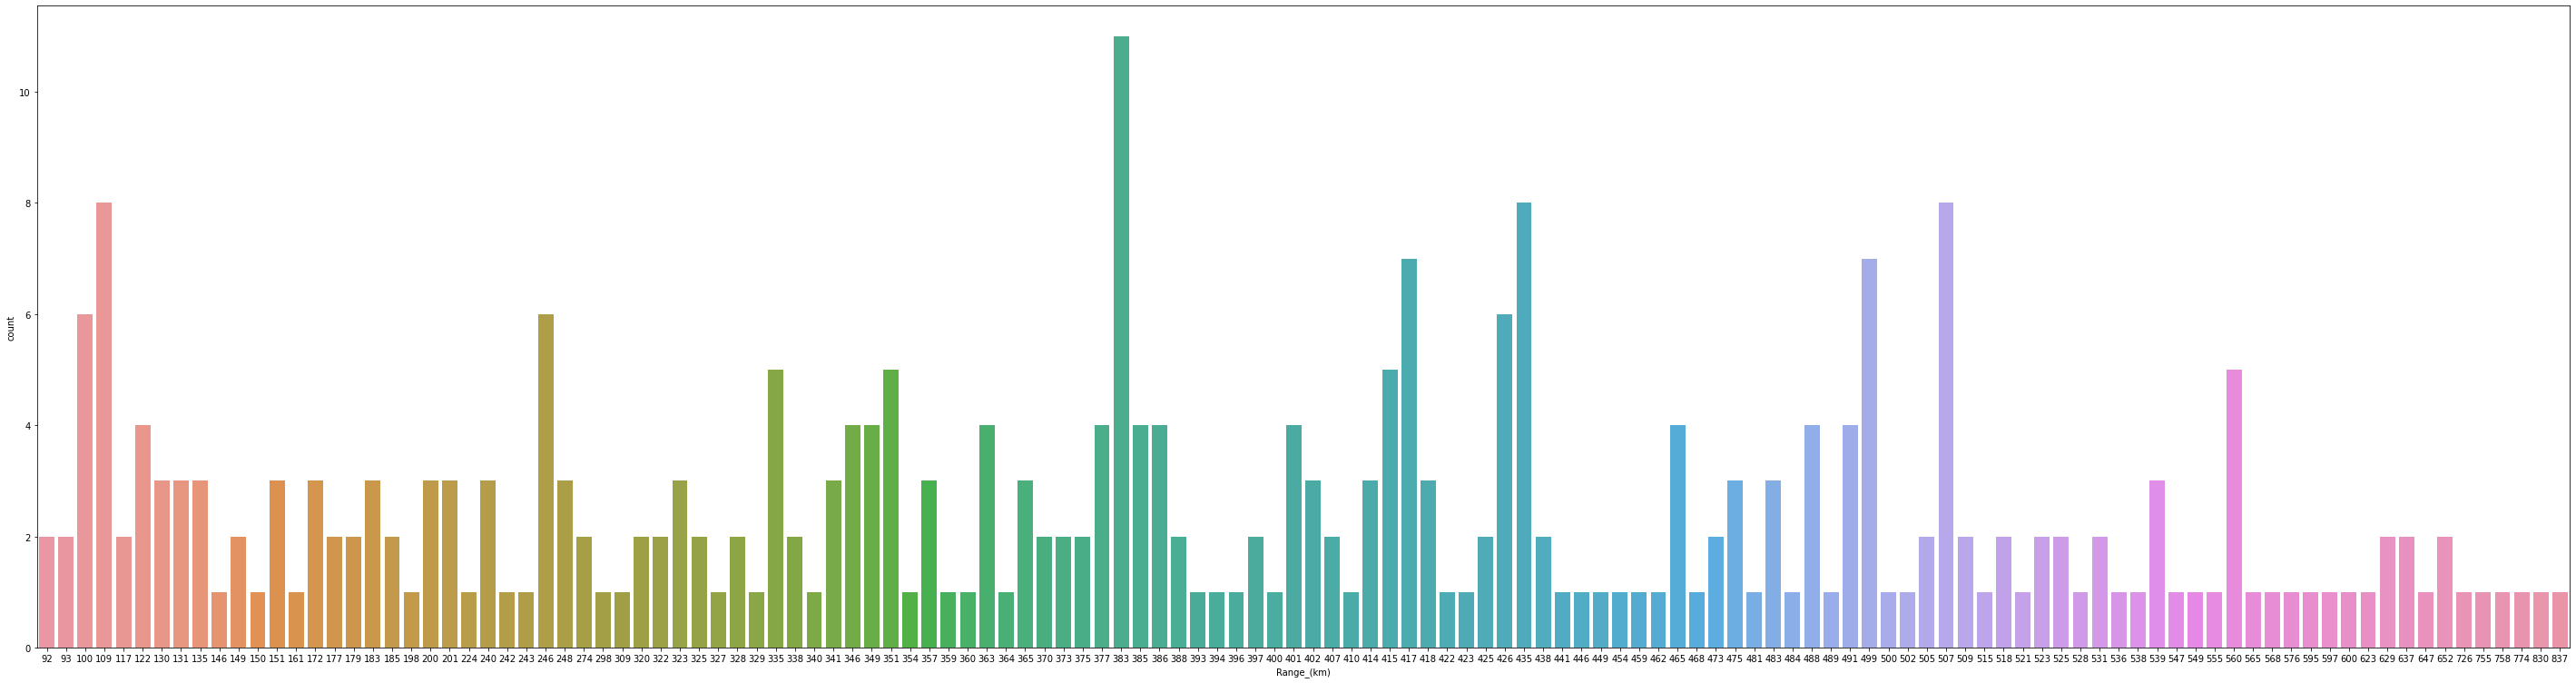

In [13]:
plt.figure(figsize=(50, 13))
sns.countplot(x=df["Range_(km)"])
plt.show()

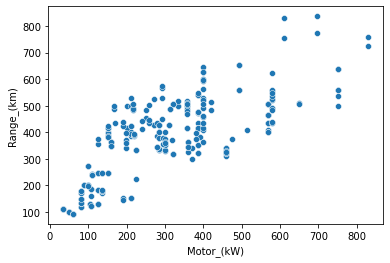

In [14]:
sns.scatterplot(x=df["Motor_(kW)"],y=df["Range_(km)"])
plt.show()


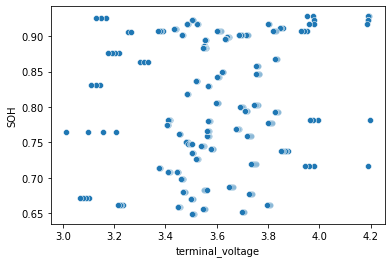

In [15]:
sns.scatterplot(x=df["terminal_voltage"],y=df["SOH"])
plt.show()

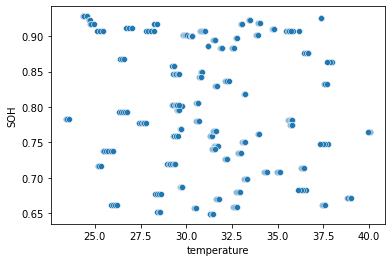

In [16]:
sns.scatterplot(x=df["temperature"],y=df["SOH"])
plt.show()

In [17]:
df.isnull().sum()

Model_Year          0
Make                0
Model               0
Vehicle Class       0
Motor_(kW)          0
Transmission        0
Fuel_Type           0
Range_(km)          0
terminal_voltage    0
terminal_current    0
temperature         0
charge_current      0
charge_voltage      0
time                0
capacity            0
cycle               0
SOH                 0
dtype: int64

In [18]:
df['terminal_voltage'].skew()

0.12831448610724608

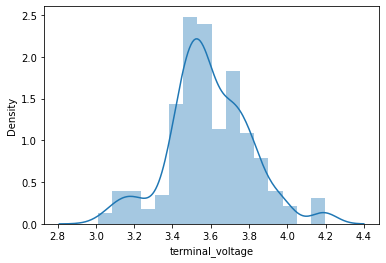

In [19]:
sns.distplot(df['terminal_voltage'])
plt.show()

In [20]:
df['temperature'].skew()

0.04253740282177602

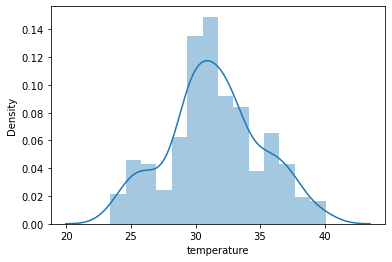

In [21]:
sns.distplot(df['temperature'])
plt.show()

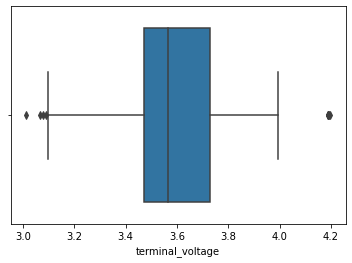

In [22]:
sns.boxplot(x=df['terminal_voltage'])
plt.show()

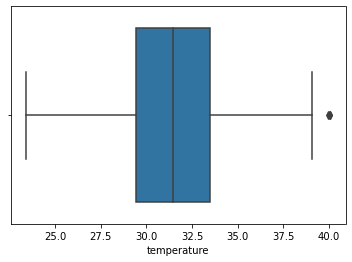

In [23]:
sns.boxplot(x=df['temperature'])
plt.show()

In [24]:
df=df.drop(columns=["Model_Year","Fuel_Type","Transmission",'Model','cycle'])
df

,Make,Vehicle Class,Motor_(kW),Range_(km),terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,SOH
0,Mitsubishi,Subcompact,49,100,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,0.928244
1,Nissan,Mid-size,80,117,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,0.928244
2,Ford,Compact,107,122,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,0.928244
3,Mitsubishi,Subcompact,49,100,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,0.928244
4,Nissan,Mid-size,80,117,4.189773,0.000021,24.697752,-0.0006,0.000,0.000,1.846327,0.923164
...,...,...,...,...,...,...,...,...,...,...,...,...
305,Tesla,SUV: Small,312,488,3.699739,-2.012856,28.590486,1.9980,2.710,412.734,1.303410,0.651705
306,Volkswagen,SUV: Small,150,422,3.511055,-2.013068,31.275448,1.9980,2.531,956.313,1.297887,0.648944
307,Volkswagen,SUV: Small,220,394,3.508710,-2.010759,31.325760,1.9980,2.529,965.656,1.297887,0.648944
308,Volvo,SUV: Small,300,364,3.506182,-2.010202,31.384132,1.9980,2.526,975.031,1.297887,0.648944


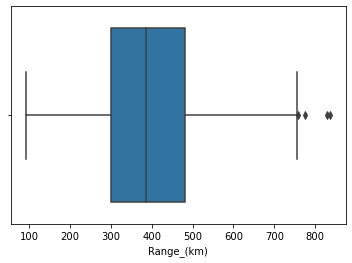

In [25]:
sns.boxplot(x=df['Range_(km)'])
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df['Make']=le.fit_transform(df['Make'])
df


,Make,Vehicle Class,Motor_(kW),Range_(km),terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,SOH
0,11,Subcompact,49,100,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,0.928244
1,12,Mid-size,80,117,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,0.928244
2,3,Compact,107,122,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,0.928244
3,11,Subcompact,49,100,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,0.928244
4,12,Mid-size,80,117,4.189773,0.000021,24.697752,-0.0006,0.000,0.000,1.846327,0.923164
...,...,...,...,...,...,...,...,...,...,...,...,...
305,16,SUV: Small,312,488,3.699739,-2.012856,28.590486,1.9980,2.710,412.734,1.303410,0.651705
306,18,SUV: Small,150,422,3.511055,-2.013068,31.275448,1.9980,2.531,956.313,1.297887,0.648944
307,18,SUV: Small,220,394,3.508710,-2.010759,31.325760,1.9980,2.529,965.656,1.297887,0.648944
308,19,SUV: Small,300,364,3.506182,-2.010202,31.384132,1.9980,2.526,975.031,1.297887,0.648944


In [28]:
df['Vehicle Class']=le.fit_transform(df['Vehicle Class'])
df

,Make,Vehicle Class,Motor_(kW),Range_(km),terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,SOH
0,11,7,49,100,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,0.928244
1,12,2,80,117,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,0.928244
2,3,0,107,122,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,0.928244
3,11,7,49,100,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,0.928244
4,12,2,80,117,4.189773,0.000021,24.697752,-0.0006,0.000,0.000,1.846327,0.923164
...,...,...,...,...,...,...,...,...,...,...,...,...
305,16,4,312,488,3.699739,-2.012856,28.590486,1.9980,2.710,412.734,1.303410,0.651705
306,18,4,150,422,3.511055,-2.013068,31.275448,1.9980,2.531,956.313,1.297887,0.648944
307,18,4,220,394,3.508710,-2.010759,31.325760,1.9980,2.529,965.656,1.297887,0.648944
308,19,4,300,364,3.506182,-2.010202,31.384132,1.9980,2.526,975.031,1.297887,0.648944


In [29]:
x = df.drop(columns=['SOH'])
y = df['SOH']


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [31]:
#x_test.to_csv(r"C:\Users\Admin\Desktop\test", index=0)
pd.DataFrame(x_test).to_csv(r"C:\Users\sanja\Desktop\CODE\FRONT END\test.csv", index=0)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor=RandomForestRegressor(n_estimators=180)

#fit the model
regressor.fit(x_train,y_train)
import pickle
#save the model
pickle.dump(regressor,open(r'C:\Users\sanja\Desktop\CODE\FRONT END\RF.pkl','wb'))

#create the predict model
y_pred1=regressor.predict(x_test)

In [33]:
from sklearn import metrics
print('The accuracy score..',regressor.score(x_train,y_train)*100)
# Model Evaluation
print('R^2:', metrics.r2_score(y_test, y_pred1))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


The accuracy score.. 99.99606009110785
R^2: 0.999851010712752
Adjusted R^2: 0.9998307775996689
MAE: 0.0007148741326165292
MSE: 1.0529578873921086e-06
RMSE: 0.0010261373628282467


In [34]:
import numpy as np
rf_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values': y_pred1})
rf_compare.head(10)


,Real Values,Predicted Values
75,0.883936,0.885440
7,0.917675,0.917641
250,0.716696,0.716018
56,0.925901,0.925724
149,0.779883,0.779957
191,0.766188,0.766499
307,0.648944,0.649249
168,0.761324,0.759515
296,0.661837,0.659525
110,0.842451,0.840129


In [35]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=180,max_depth=100)

#fit the model
xgb.fit(x_train,y_train)
import pickle
#save the model
pickle.dump(regressor,open(r'C:\Users\sanja\Desktop\CODE\FRONT END\xgb.pkl','wb'))
#create the predict model
y_pred2=xgb.predict(x_test)


In [36]:
print('The accuracy score..',xgb.score(x_train,y_train)*100)
# Model Evaluation
print('R^2:', metrics.r2_score(y_test, y_pred2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred2))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:',metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

The accuracy score.. 99.99882575354448
R^2: 0.9999423608281188
Adjusted R^2: 0.9999345332862584
MAE: 0.0003812441579543901
MSE: 4.0735560103683333e-07
RMSE: 0.0006382441547220259


In [37]:
rf_compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values': y_pred2})
rf_compare.head(10)


,Real Values,Predicted Values
75,0.883936,0.883823
7,0.917675,0.917749
250,0.716696,0.717402
56,0.925901,0.925519
149,0.779883,0.779773
191,0.766188,0.765851
307,0.648944,0.649568
168,0.761324,0.761078
296,0.661837,0.661614
110,0.842451,0.842828
